In [ ]:

# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

try:
    from xgboost import XGBRegressor
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False
    print("XGBoost is not installed; the pipeline will proceed without it.")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [ ]:

DATA_URL = "https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv"
LOCAL_PATH = None  # e.g., r"./kc_house_data.csv"

def load_data():
    if LOCAL_PATH is not None:
        return pd.read_csv(LOCAL_PATH)
    else:

        return pd.read_csv(DATA_URL)
    
df = load_data()
print(df.shape)
df.head()


(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



## Dataset Overview


In [3]:

display(df.head())
display(df.describe(include='all'))
df.info()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:

def introduce_missing_values(df, columns, frac=0.05, random_state=RANDOM_STATE):
    df = df.copy()
    rng = np.random.default_rng(random_state)
    n = len(df)
    for col in columns:
        idx = rng.choice(n, size=int(frac*n), replace=False)
        df.loc[idx, col] = np.nan
    return df

df = introduce_missing_values(df, ['sqft_lot', 'bathrooms'], frac=0.05, random_state=RANDOM_STATE)
df[['sqft_lot', 'bathrooms']].isna().mean()


sqft_lot     0.04997
bathrooms    0.04997
dtype: float64

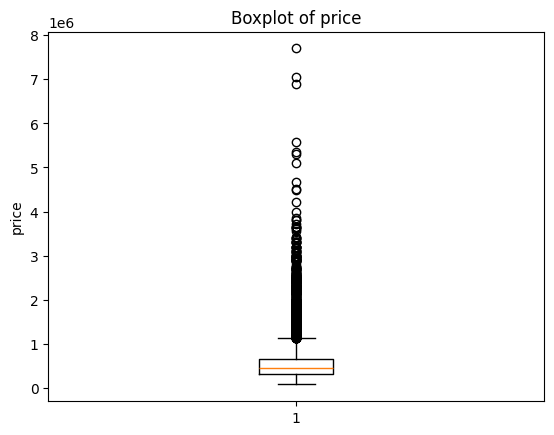

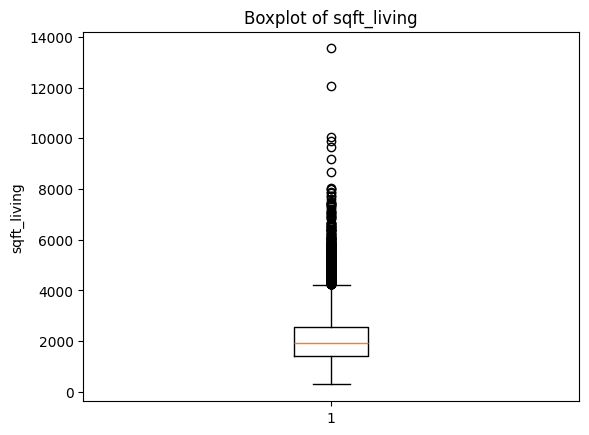

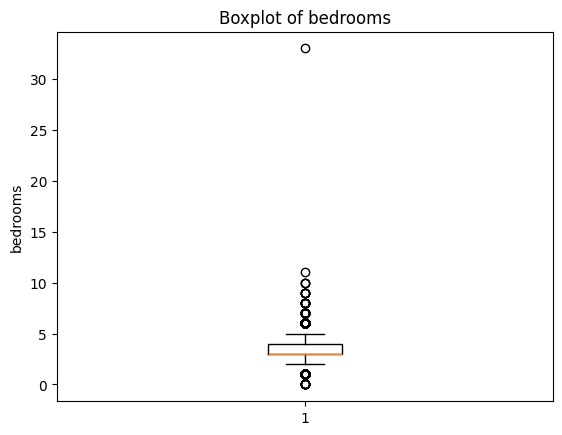

Outliers removed (union across ['price', 'sqft_living', 'bedrooms']): 1788
(21613, 21) -> (19825, 21)


In [5]:

cols_box = ['price', 'sqft_living', 'bedrooms']

for c in cols_box:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Boxplot of {c}")
    plt.ylabel(c)
    plt.show()

def remove_outliers_iqr(dataframe, cols, k=1.5):
    df_clean = dataframe.copy()
    mask = pd.Series([True]*len(df_clean), index=df_clean.index)
    for c in cols:
        q1 = df_clean[c].quantile(0.25)
        q3 = df_clean[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k*iqr
        upper = q3 + k*iqr
        mask &= df_clean[c].between(lower, upper, inclusive="both")
    removed = (~mask).sum()
    print(f"Outliers removed (union across {cols}): {removed}")
    return df_clean.loc[mask].reset_index(drop=True)

df_clean = remove_outliers_iqr(df, cols_box, k=1.5)
print(df.shape, "->", df_clean.shape)



### 3) Advanced Feature Engineering

In [6]:

df_fe = df_clean.copy()

# Ensure datetime
df_fe['date'] = pd.to_datetime(df_fe['date'], errors='coerce')

# Date-based features
df_fe['sale_year'] = df_fe['date'].dt.year
df_fe['sale_month'] = df_fe['date'].dt.month

# House age at sale
df_fe['house_age'] = df_fe['sale_year'] - df_fe['yr_built']

# Renovation flags
df_fe['was_renovated'] = (df_fe['yr_renovated'].fillna(0) > 0).astype(int)

# Years since renovation: if never renovated, same as house_age (or NaN -> fill later)
df_fe['age_since_renovation'] = np.where(
    df_fe['yr_renovated'].fillna(0) > 0,
    df_fe['sale_year'] - df_fe['yr_renovated'].replace(0, np.nan),
    df_fe['house_age']
)

# Ratio features with safe division
def safe_divide(a, b):
    return np.where(b==0, np.nan, a / b)

df_fe['sqft_living_per_floor'] = safe_divide(df_fe['sqft_living'], df_fe['floors'].replace(0, np.nan))
df_fe['bath_per_bed'] = safe_divide(df_fe['bathrooms'], df_fe['bedrooms'].replace(0, np.nan))

# Target
target = 'price'
y = df_fe[target].values

# Drop rows with invalid target or dates
df_fe = df_fe[~df_fe['sale_year'].isna()].copy()
y = df_fe[target].values

print("Engineered columns added:", [c for c in ['sale_year','sale_month','house_age','was_renovated','age_since_renovation','sqft_living_per_floor','bath_per_bed'] if c in df_fe.columns])
df_fe.head()


Engineered columns added: ['sale_year', 'sale_month', 'house_age', 'was_renovated', 'age_since_renovation', 'sqft_living_per_floor', 'bath_per_bed']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,-122.257,1340,5650,2014,10,59,0,59.0,1180.0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,-122.319,1690,7639,2014,12,63,1,23.0,1285.0,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,-122.233,2720,8062,2015,2,82,0,82.0,770.0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,-122.393,1360,5000,2014,12,49,0,49.0,1960.0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,-122.045,1800,7503,2015,2,28,0,28.0,1680.0,0.666667



## Split Data


In [10]:

X = df_fe.drop(columns=[target, 'date'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train.shape, X_test.shape


((15860, 26), (3965, 26))


## Task 2 — Sophisticated Preprocessing Pipeline

In [11]:

# Columns present
all_cols = X_train.columns.tolist()

# Known categorical
categorical_features = ['zipcode']
categorical_features = [c for c in categorical_features if c in all_cols]

# Passthrough candidates (ordinal-ish / already discrete meaningful scales)
passthrough_features = [c for c in ['grade', 'condition', 'waterfront', 'view', 'was_renovated'] if c in all_cols]

# Numerical = everything else that's numeric (and not categorical/passthrough)
# Keep only numeric dtypes first
numeric_like = X_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [c for c in numeric_like if c not in categorical_features + passthrough_features]

print("Numerical:", numeric_features[:10], "...", f"({len(numeric_features)})")
print("Categorical:", categorical_features)
print("Passthrough:", passthrough_features)


Numerical: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] ... (20)
Categorical: ['zipcode']
Passthrough: ['grade', 'condition', 'waterfront', 'view', 'was_renovated']



### Build Preprocessing Pipelines


In [12]:

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'  # keep passthrough features as-is
)

# Small sanity check
_ = preprocessor.fit(X_train)
print("Preprocessor fitted.")


Preprocessor fitted.


In [13]:

pipelines = {}
param_grids = {}

# Random Forest
pipelines['rf'] = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', RandomForestRegressor(random_state=RANDOM_STATE))])
param_grids['rf'] = {
    'regressor__n_estimators': [200, 400],
    'regressor__max_depth': [None, 15]
}

# Gradient Boosting
pipelines['gbr'] = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', GradientBoostingRegressor(random_state=RANDOM_STATE))])
param_grids['gbr'] = {
    'regressor__n_estimators': [200, 400],
    'regressor__learning_rate': [0.05, 0.1]
}

# XGBoost (optional)
if XGB_AVAILABLE:
    pipelines['xgb'] = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', XGBRegressor(random_state=RANDOM_STATE, 
                                                                 objective="reg:squarederror",
                                                                 n_estimators=300))])
    param_grids['xgb'] = {
        'regressor__max_depth': [4, 6],
        'regressor__learning_rate': [0.05, 0.1]
    }

list(pipelines.keys())


['rf', 'gbr', 'xgb']

In [17]:

results = {}

for name, pipe in pipelines.items():
    print(f"\nRunning GridSearchCV for: {name}")
    
    grid = GridSearchCV(
        pipe,
        param_grid=param_grids[name],
        cv=3,
        n_jobs=-1,
        scoring='neg_root_mean_squared_error'
    )
    
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # <-- fixed
    
    results[name] = {
        'best_params': grid.best_params_,
        'best_cv_rmse': -grid.best_score_,
        'test_r2': r2,
        'test_mae': mae,
        'test_rmse': rmse,
        'best_estimator': grid.best_estimator_,
    }
    
    print(f"Best params: {grid.best_params_}")
    print(f"Test R2: {r2:.4f}, MAE: {mae:,.2f}, RMSE: {rmse:,.2f}")

results



Running GridSearchCV for: rf
Best params: {'regressor__max_depth': None, 'regressor__n_estimators': 400}
Test R2: 0.8596, MAE: 51,668.32, RMSE: 76,154.25

Running GridSearchCV for: gbr
Best params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 400}
Test R2: 0.8758, MAE: 49,874.86, RMSE: 71,621.52

Running GridSearchCV for: xgb
Best params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 6}
Test R2: 0.8818, MAE: 47,441.48, RMSE: 69,870.76


{'rf': {'best_params': {'regressor__max_depth': None,
   'regressor__n_estimators': 400},
  'best_cv_rmse': np.float64(77507.57739914952),
  'test_r2': 0.8596232780971451,
  'test_mae': 51668.3244095193,
  'test_rmse': np.float64(76154.2545374338),
  'best_estimator': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('num',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='median')),
                                                                    ('scaler',
                                                                     StandardScaler())]),
                                                    ['id', 'bedrooms',
                                                     'bathrooms', 'sqft_living',
                                                     'sqft_lot', 'floors


## Task 4 — Evaluation and Interpretation

### 1) Final Evaluation

In [18]:

# Determine best by lowest test RMSE
best_name = min(results, key=lambda k: results[k]['test_rmse'])
best = results[best_name]
print("Best model:", best_name)
print("Best params:", best['best_params'])
print(f"Test R2: {best['test_r2']:.4f}, MAE: {best['test_mae']:,.2f}, RMSE: {best['test_rmse']:,.2f}")


Best model: xgb
Best params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 6}
Test R2: 0.8818, MAE: 47,441.48, RMSE: 69,870.76



### 2) Performance Comparison

Baseline RMSE (LinearRegression): 81,617.51
Best Tuned RMSE (xgb): 69,870.76
Improvement: 14.39%


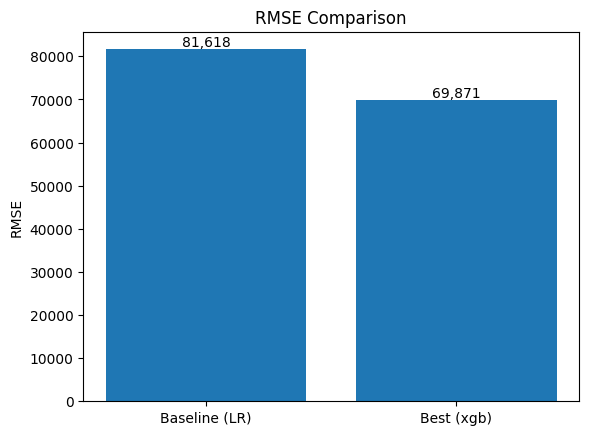

In [20]:
baseline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
baseline.fit(X_train, y_train)
pred_base = baseline.predict(X_test)

# Safe RMSE calculation (works on all sklearn versions)
rmse_base = np.sqrt(mean_squared_error(y_test, pred_base))
rmse_best = best['test_rmse']

improvement = (rmse_base - rmse_best) / rmse_base * 100.0

print(f"Baseline RMSE (LinearRegression): {rmse_base:,.2f}")
print(f"Best Tuned RMSE ({best_name}): {rmse_best:,.2f}")
print(f"Improvement: {improvement:.2f}%")

# Bar chart
labels = ['Baseline (LR)', f'Best ({best_name})']
values = [rmse_base, rmse_best]

plt.figure()
plt.bar(labels, values)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
for i, v in enumerate(values):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom')
plt.show()



### 3) Feature Importance (Tree-based models only)

Top 5 important features:


,importance
view,0.227145
lat,0.125449
sqft_living,0.102456
zipcode_98004,0.046664
house_age,0.029604


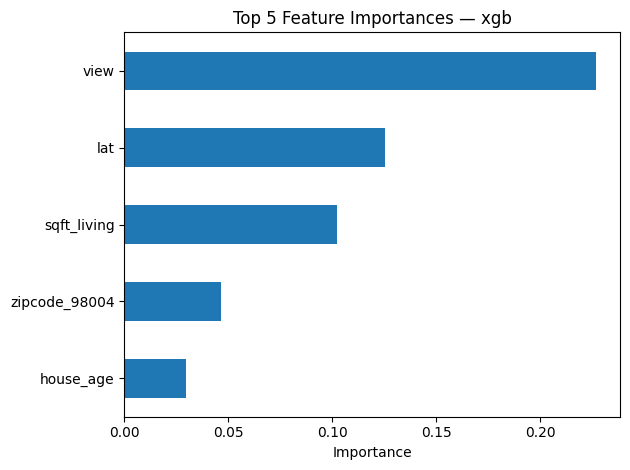

In [23]:

def get_feature_names(preprocessor, numeric_features, categorical_features, passthrough_features):
    # Names from numeric + categorical transformers
    num_names = numeric_features
    cat_names = []
    # OneHot feature names
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    if hasattr(ohe, 'get_feature_names_out'):
        cat_names = ohe.get_feature_names_out(categorical_features).tolist()
    else:
        # Fallback generic names
        cat_names = [f"cat_{i}" for i in range(len(categorical_features))]
    # Remainder='passthrough' appends passthrough features at the end
    return num_names + cat_names + passthrough_features

best_est = best['best_estimator']
reg = best_est.named_steps['regressor']

is_tree = hasattr(reg, 'feature_importances_')
if is_tree:
    # Derive final feature names
    feat_names = get_feature_names(preprocessor, numeric_features, categorical_features, passthrough_features)
    # Transform X_train once to ensure alignment
    _ = preprocessor.fit(X_train)
    # Align feature importances length with transformed matrix features
    # ColumnTransformer output = num + cat(ohe) + passthrough
    transformed = preprocessor.transform(X_train)
    # Some models may reduce/alter; assume alignment as we didn't change columns post-preprocess
    importances = getattr(reg, 'feature_importances_', None)
    if importances is not None and len(importances) == transformed.shape[1]:
        imp_series = pd.Series(importances, index=feat_names)
        imp_series = imp_series.sort_values(ascending=False)
        top5 = imp_series.head(5)
        print("Top 5 important features:")
        display(top5.to_frame('importance'))
        
        # Plot
        plt.figure()
        top5.sort_values().plot(kind='barh')
        plt.title(f"Top 5 Feature Importances — {best_name}")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print("Warning: Feature names and importances length mismatch; skipping plot.")
else:
    print(f"The best model ({best_name}) is not tree-based; feature importances not available.")



# 📌 Summary

## Best Model: XGBoost
## Top 5 Engineered columns added: ['sale_year', 'sale_month', 'house_age', 'was_renovated', 'age_since_renovation', 'sqft_living_per_floor', 'bath_per_bed']
